In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [1]:
def fourier(image):
    def aux(u,v):
        pixel = 0
        for x in range(0,m):
            for y in range(0,n):
                aux0 = 2 * np.pi * ((u*x)/m+(v*y)/n)
                pixel += image[x,y] * np.cos(-aux0) - complex(0,1) * np.sin(aux0)          
                
                #np.exp(np.complex(0,-1)*2*np.pi*((u*x)/m+(v*y)/n))
        return pixel
    
    G = np.ndarray(image.shape, dtype=complex)
    m,n = image.shape
    for u in range(0,m):
        for v in range(0,n):
            G[u,v] = aux(u, v)
    return G/(m*n)

In [2]:
def invf(G):
    def aux(x,y):
        pixel = 0
        for u in range(0,m):
            for v in range(0,n):
                aux0 = 2 * np.pi * ((u*x)/m+(v*y)/n)
                pixel += G[u,v] * np.cos(aux0) + complex(0,1) * np.sin(aux0)          
                
                #np.exp(np.complex(0,-1)*2*np.pi*((u*x)/m+(v*y)/n))
        return pixel
    
    f = np.ndarray(G.shape, dtype=complex)
    m,n = G.shape
    for x in range(0,m):
        for y in range(0,n):
            f[x,y] = aux(x, y)
    return f

In [8]:
img = plt.imread("sin2.gif")
#img = img[:,:,0]
img = img[0:256:8,0:256:8,0]

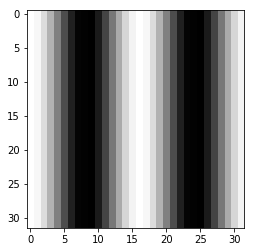

In [9]:
plt.imshow(img, interpolation='nearest', cmap='gray')

In [10]:
fftimage = np.fft.fft2(img)

In [11]:
image = fourier(img)

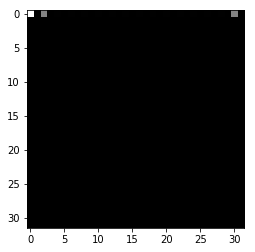

In [12]:
plt.imshow(abs(image), interpolation='nearest', cmap='gray')

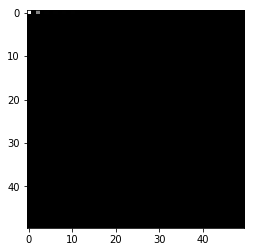

In [98]:
plt.imshow(abs(fftimage[0:50,0:50]), interpolation='nearest', cmap='gray')

In [13]:
inv = invf(image)

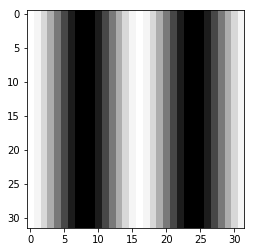

In [14]:
plt.imshow(abs(inv), interpolation='nearest', cmap='gray')